In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pandas import Series, DataFrame
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import LabelEncoder

/Library/Python/2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.ensemble import RandomForestClassifier
from numpy import genfromtxt, savetxt

In [3]:
cols=['name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']

In [4]:
df= pd.read_csv('/work/datasets/zoo/zoo.txt', sep=' ',names=cols)[15:]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 15 to 116
Data columns (total 18 columns):
name        102 non-null object
hair        102 non-null object
feathers    102 non-null object
eggs        102 non-null object
milk        102 non-null object
airborne    102 non-null object
aquatic     102 non-null object
predator    102 non-null object
toothed     102 non-null object
backbone    102 non-null object
breathes    102 non-null object
venomous    102 non-null object
fins        102 non-null object
legs        102 non-null object
tail        102 non-null object
domestic    102 non-null object
catsize     102 non-null object
type        102 non-null object
dtypes: object(18)
memory usage: 14.4+ KB


In [50]:
df[(df.type=='bird')]

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
26,chicken,no,yes,yes,no,yes,no,no,no,yes,yes,no,no,2,yes,yes,no,bird
31,crow,no,yes,yes,no,yes,no,yes,no,yes,yes,no,no,2,yes,no,no,bird
35,dove,no,yes,yes,no,yes,no,no,no,yes,yes,no,no,2,yes,yes,no,bird
36,duck,no,yes,yes,no,yes,yes,no,no,yes,yes,no,no,2,yes,no,no,bird
38,flamingo,no,yes,yes,no,yes,no,no,no,yes,yes,no,no,2,yes,no,yes,bird
48,gull,no,yes,yes,no,yes,yes,yes,no,yes,yes,no,no,2,yes,no,no,bird
52,hawk,no,yes,yes,no,yes,no,yes,no,yes,yes,no,no,2,yes,no,no,bird
56,kiwi,no,yes,yes,no,no,no,yes,no,yes,yes,no,no,2,yes,no,no,bird
58,lark,no,yes,yes,no,yes,no,no,no,yes,yes,no,no,2,yes,no,no,bird
72,ostrich,no,yes,yes,no,no,no,no,no,yes,yes,no,no,2,yes,no,yes,bird


In [26]:
df.apply(LabelEncoder().fit_transform)

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
15,0,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,4
16,1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,4
17,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1
18,3,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,4
19,4,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1,4
20,5,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,4
21,6,1,0,0,1,0,0,0,1,1,1,0,0,2,1,1,1,4
22,7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1
23,8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1
24,9,1,0,0,1,0,0,0,1,1,1,0,0,2,0,1,0,4


In [27]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [40]:
joblib.dump(d, 'sw_day_label_encoder.pkl') 

['sw_day_label_encoder.pkl']

In [49]:
defd = joblib.load('sw_day_label_encoder.pkl') 
print defd['type'].inverse_transform(4)

defd['type'].transform('mammal')

mammal


ValueError: bad input shape ()

In [47]:
fit[16:17].apply(lambda x: defd[x.name].inverse_transform(x))

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
31,crow,no,yes,yes,no,yes,no,yes,no,yes,yes,no,no,2,yes,no,no,bird


In [39]:
# Encoding the variable
#fit = df.apply(lambda x: d[x.name].fit_transform(x))
#fit
# Inverse the encoded
#fit.apply(lambda x: d[x.name].inverse_transform(x))
#fit
# Using the dictionary to label future data
df.apply(lambda x: d[x.name].transform(x))

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
15,0,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,4
16,1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,4
17,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1
18,3,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,4
19,4,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1,4
20,5,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,4
21,6,1,0,0,1,0,0,0,1,1,1,0,0,2,1,1,1,4
22,7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1
23,8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1
24,9,1,0,0,1,0,0,0,1,1,1,0,0,2,0,1,0,4


In [11]:
fit.describe()

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,49.754902,0.421569,0.196078,0.588235,0.401961,0.245098,0.352941,0.558824,0.598039,0.813725,0.794118,0.078431,0.166667,1.568627,0.735294,0.127451,0.431373,2.911765
std,29.259656,0.496249,0.398989,0.494583,0.492715,0.432270,0.480245,0.498980,0.492715,0.391251,0.406342,0.270177,0.374518,1.270455,0.443355,0.335124,0.497714,1.955459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,49.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,4.000000
75%,74.750000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,4.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,6.000000


In [10]:
colsRes = ['type']

In [11]:
colsr=cols[1:-1]
print len(colsr)

16


In [12]:
trainArr = fit.as_matrix(cols[1:17]) #training array
len(trainArr[0])

16

In [13]:
trainRes = np.ravel(fit.as_matrix(colsRes))
trainRes

array([4, 4, 1, 4, 4, 4, 4, 1, 1, 4, 4, 0, 1, 6, 6, 6, 0, 4, 1, 4, 0, 0, 4,
       0, 3, 2, 2, 4, 4, 4, 3, 4, 4, 0, 1, 4, 4, 0, 1, 3, 3, 0, 3, 0, 4, 4,
       6, 4, 3, 4, 4, 4, 3, 2, 6, 4, 4, 0, 0, 0, 0, 1, 1, 5, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 6, 1, 4, 4, 5, 6, 0, 0, 5, 6, 1, 0, 4, 6, 1, 0, 3, 2, 5,
       5, 1, 4, 4, 0, 4, 3, 4, 6, 0])

In [14]:
## Training
#rf = RandomForestClassifier(n_estimators=100) # initialize
from sklearn import tree
rf = tree.DecisionTreeClassifier()
rf.fit(trainArr, trainRes) # fit the data to the algorithm

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
predicted = rf.predict(trainArr)
predicted == trainRes

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [16]:
from sklearn.externals import joblib
#print joblib.__version__
joblib.dump(rf, 'sw_day_model.pkl') 

0.11


['sw_day_model.pkl']

In [17]:
clf = joblib.load('sw_day_model.pkl') 

In [61]:
testArr = fit[7:14].as_matrix(cols[1:18])
testArr

array([[0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 4],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 4],
       [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6]])

In [19]:
testArr = [[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1]]

In [20]:
clf.predict(testArr)

array([4])

In [33]:
print d['type'].inverse_transform(4)

d['type'].fit_transform('mammal')

mammal


ValueError: bad input shape ()

In [93]:
filtered=fit[(fit.hair==1)&(fit.predator==0)&(fit.fins==0)]
fit.query('(hair==1)&(predator==0)&(fins==0)')

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
16,1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,4
20,5,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,4
21,6,1,0,0,1,0,0,0,1,1,1,0,0,2,1,1,1,4
24,9,1,0,0,1,0,0,0,1,1,1,0,0,2,0,1,0,4
32,17,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,4
37,22,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,4
42,26,1,0,0,1,1,0,0,1,1,1,0,0,1,1,0,0,4
43,27,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,4
46,30,1,0,0,1,0,0,0,1,1,1,0,0,2,1,1,1,4
47,31,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,1,4


In [92]:
a

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
31,16,0,1,1,0,1,0,1,0,1,1,0,0,1,1,0,0,0


In [255]:
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), colsr), 
             reverse=True)

[(0.4076, 'milk'), (0.2282, 'feathers'), (0.1645, 'backbone'), (0.0889, 'fins'), (0.0416, 'airborne'), (0.0315, 'legs'), (0.022, 'aquatic'), (0.0157, 'predator'), (0.0, 'venomous'), (0.0, 'toothed'), (0.0, 'tail'), (0.0, 'hair'), (0.0, 'eggs'), (0.0, 'domestic'), (0.0, 'catsize'), (0.0, 'breathes')]


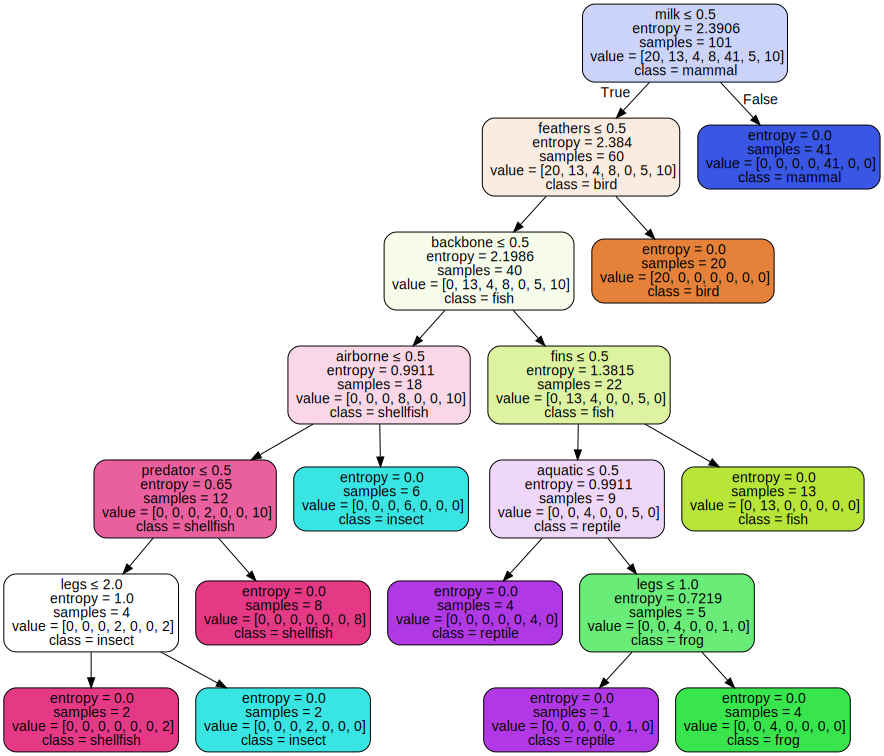

In [256]:
from sklearn.tree import export_graphviz
import graphviz
classes= map(lambda x: d['type'].inverse_transform(x),rf.classes_)
#export_graphviz(rf, out_file="mytree.dot")
tree.export_graphviz(rf, out_file="mytree.dot",  
                        feature_names=colsr,  
                        class_names=classes,  
                        filled=True, rounded=True,  
                        special_characters=True)  
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

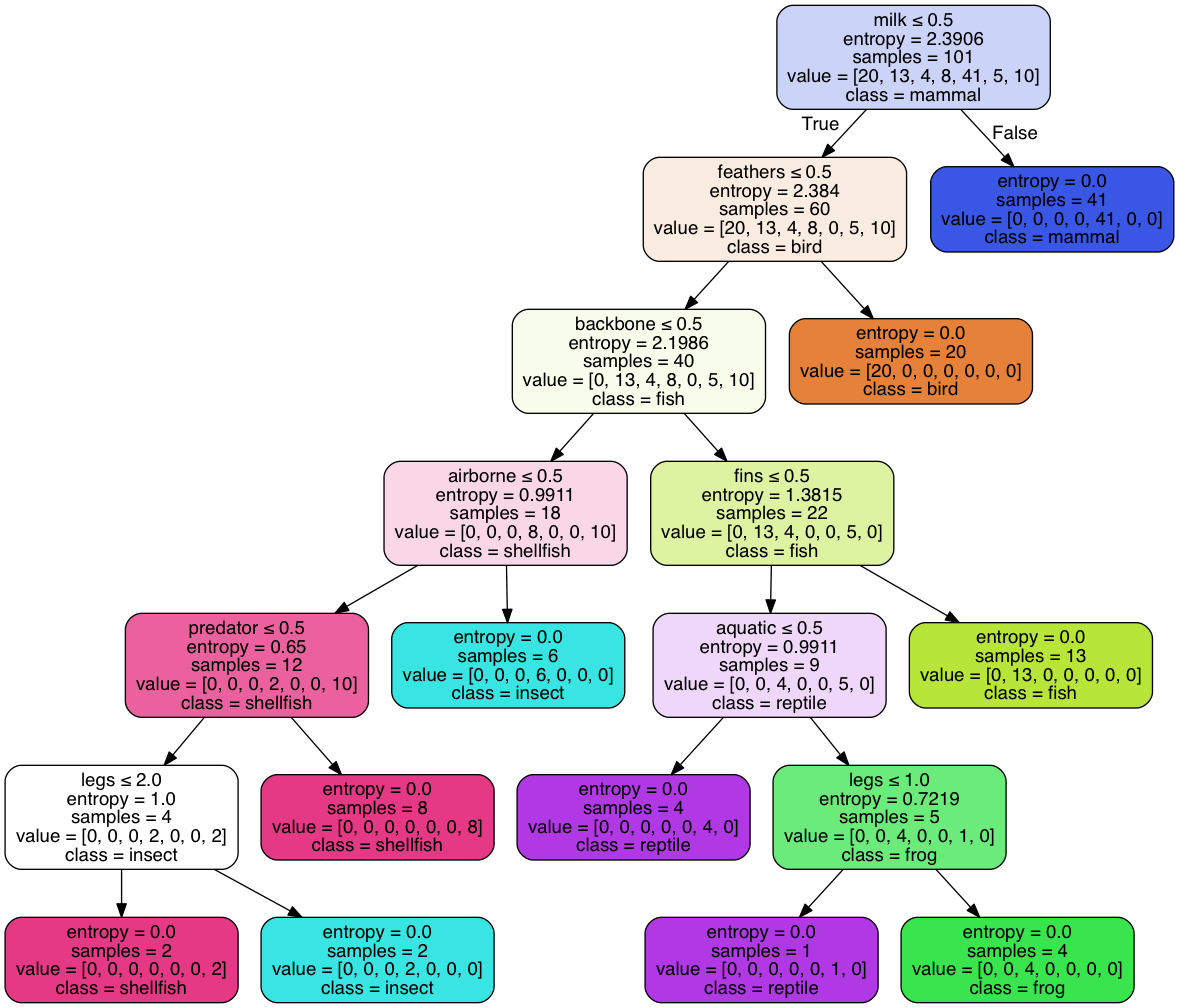

In [257]:
from IPython.display import Image 
import pydot
dot_data = StringIO()  
classes= map(lambda x: d['type'].inverse_transform(x),rf.classes_)
tree.export_graphviz(rf, out_file=dot_data,  
                         feature_names=colsr,  
                         class_names=classes,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [147]:
#rf.classes_.apply(lambda x: d['type'].inverse_transform(x))
classes= map(lambda x: d['type'].inverse_transform(x),rf.classes_)

In [108]:
print joblib.__version__

0.9.4


In [32]:
d['type']

LabelEncoder()